In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Line Detection - Using Hough Lines**
   
The Hough transform takes a binary edge map as input and attempts to locate edges placed as straight lines. The idea of the Hough transform is, that every edge point in the edge map is transformed to all possible lines that could pass through that point.

`cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)`
- Threshold here is the minimum vote for it to be considered a line

In [3]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/suduku.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('suduku.png', 'wb') as f:
    f.write(response.content)

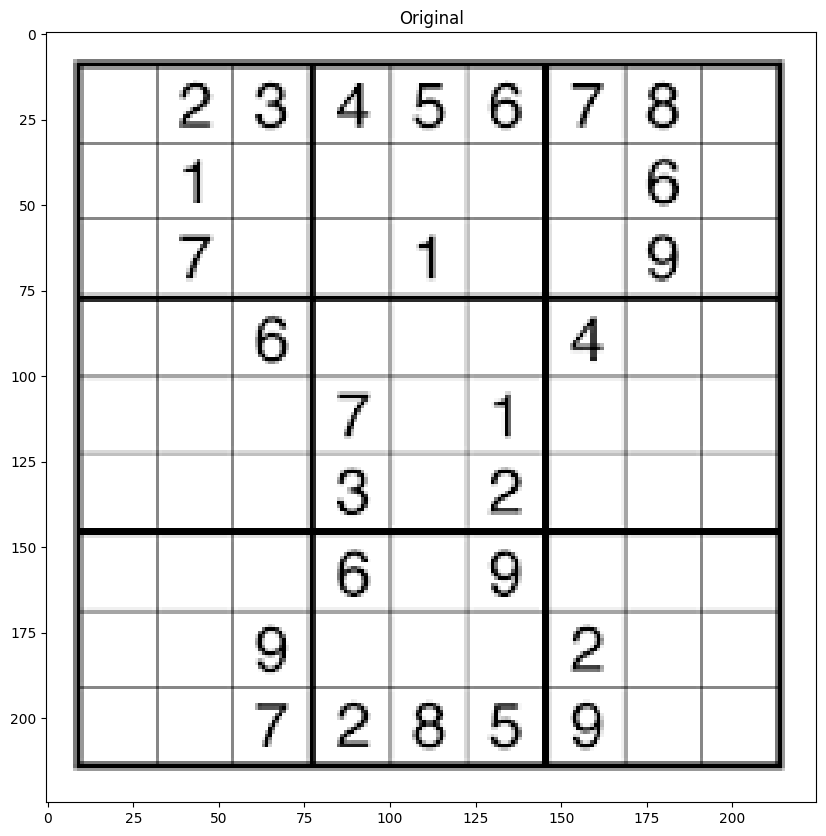

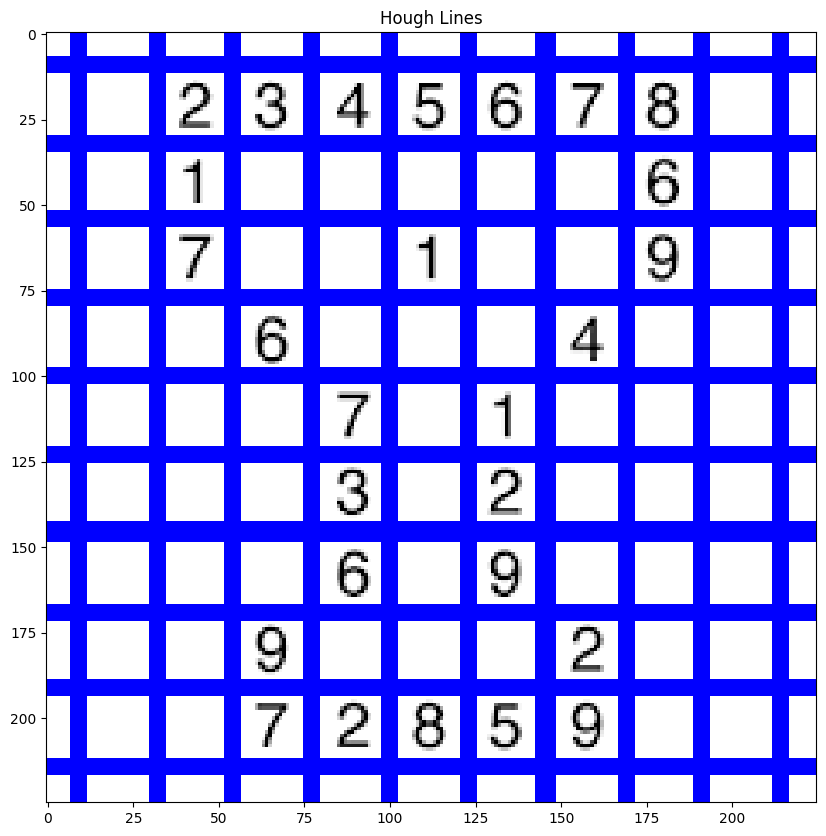

In [3]:
image = cv2.imread('suduku.png')
imshow('Original', image)

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)


# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 150 (number of points on line)
# Apply Hough line detection
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# Check if the line detection was successful
if lines is None:
    print("Error: Hough line detection failed.")
    exit()

# We iterate through each line and convert it to the format
# required by cv2.lines (i.e. requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow('Hough Lines', image)

## **Probabilistic Hough Lines**
A Hough Transform is considered probabilistic if it uses random sampling of the edge points. These algorithms can be divided based on how they map image space to parameter space.

```
cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)
```

(49, 1, 4)


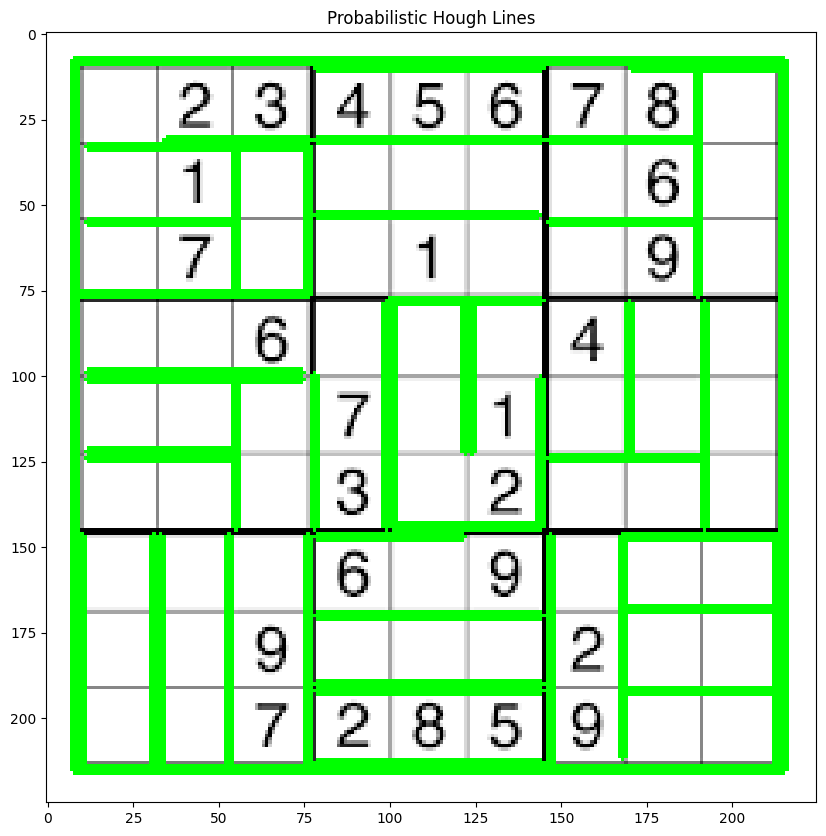

In [6]:
# Grayscale and Canny Edges extracted
image = cv2.imread('suduku.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 3 pixels and max gap between lines of 25 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, 3, 25)
print(lines.shape)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

imshow('Probabilistic Hough Lines', image)

## **Circle Detection - Hough Cirlces**

``cv2.HoughCircles(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)``


- Method - currently only cv2.HOUGH_GRADIENT available
- dp - Inverse ratio of accumulator resolution
- MinDist - the minimum distance between the center of detected circles
- param1 - Gradient value used in the edge detection
- param2 - Accumulator threshold for the HOUGH_GRADIENT method (lower allows more circles to be detected (false positives))
- minRadius - limits the smallest circle to this size (via radius)
- MaxRadius - similarly sets the limit for the largest circles

In [7]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/circles.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('circles.png', 'wb') as f:
    f.write(response.content)

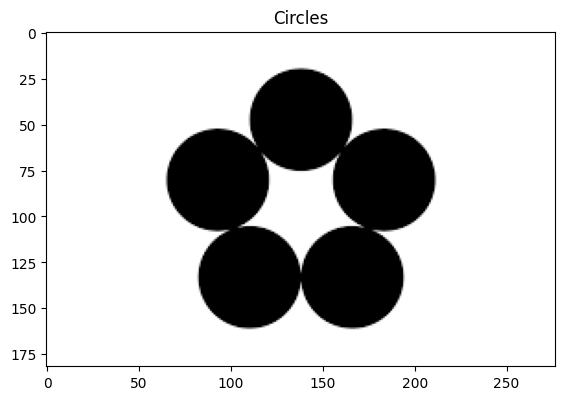

[[[110.  134.   28.4]
  [166.  134.   28.4]
  [138.   46.   28. ]
  [ 94.   82.   29.6]
  [182.   82.   29.6]]]


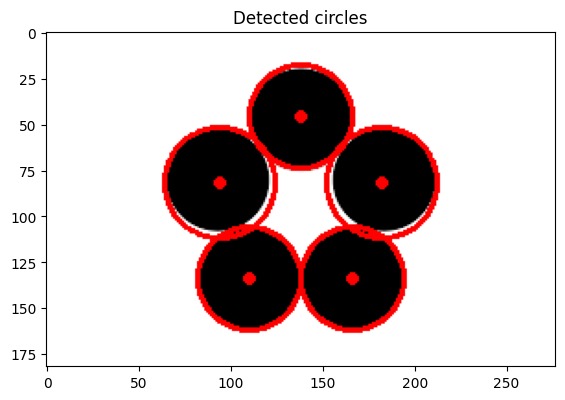

In [19]:
image = cv2.imread('circles.png')
imshow('Circles', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 4, 25)
print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))

    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 255), 2)

        # draw the center of the circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 2)

imshow('Detected circles', image)

## **Blob Detection**
The function **cv2.drawKeypoints** takes the following arguments:

``cv2.drawKeypoints(input image, keypoints, blank_output_array, color, flags)``

flags:
- cv2.DRAW_MATCHES_FLAGS_DEFAULT
- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
- cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
- cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

In [24]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/sunflower.jpeg"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('sunflower.jpeg', 'wb') as f:
    f.write(response.content)

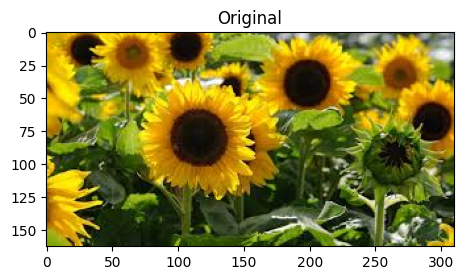

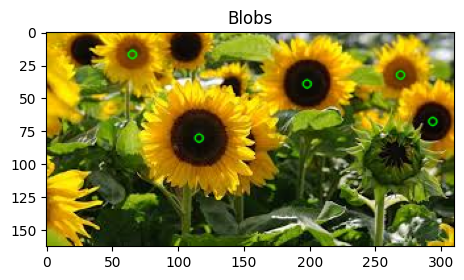

In [25]:
# Read image
image = cv2.imread("sunflower.jpeg")
imshow("Original", image)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Show keypoints
imshow("Blobs", blobs)

## **Counting Circular Blobs**


![](https://i.stack.imgur.com/zYL2C.jpg)

![](https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/simpleblob.png)

In [26]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/blobs.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('blobs.png', 'wb') as f:
    f.write(response.content)

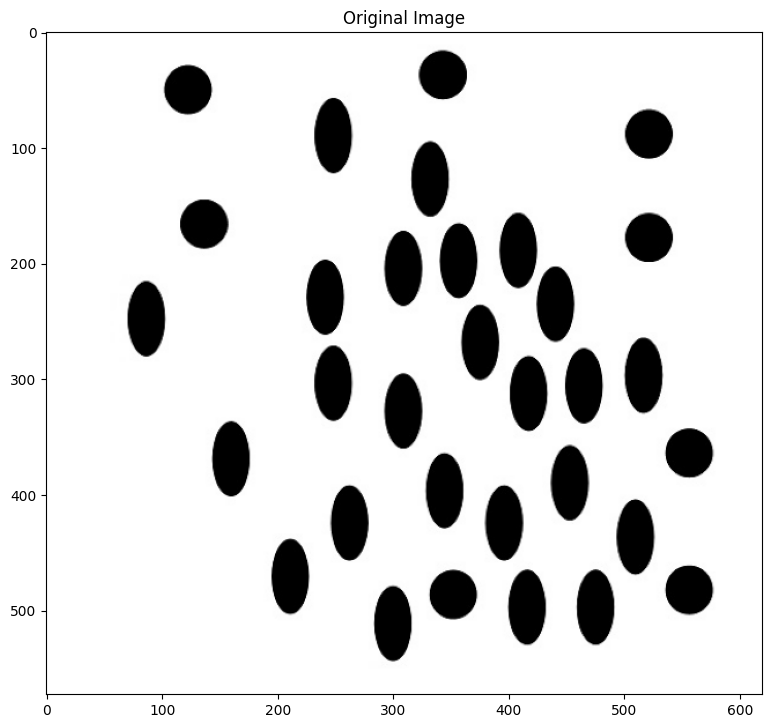

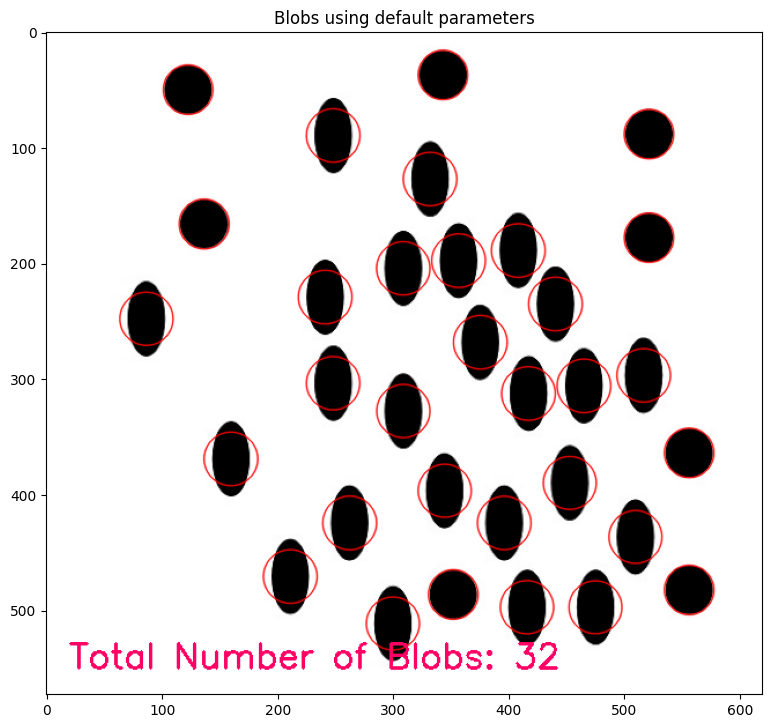

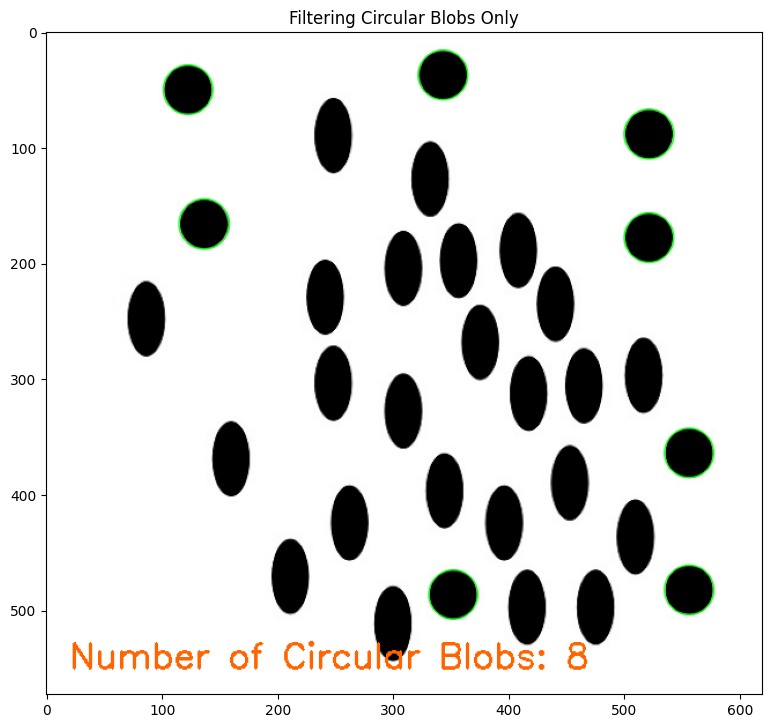

In [27]:
# Load image
image = cv2.imread("blobs.png", 0)
imshow('Original Image',image)

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
imshow("Blobs using default parameters", blobs)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)


# **Finding Waldo Using Template Matching**

#### **Notes on Template Matching**

There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag ``cv2.TM_CCOEFF.``

So what exactly is the cv2.matchTemplate function doing?
Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is.

Regions with sufficiently high correlation can be considered “matches” for our waldo template.
From there, all we need is a call to cv2.minMaxLoc on Line 22 to find where our “good” matches are.
That’s really all there is to template matching!

http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html      

In [33]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/wald_part.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('wald_part.png', 'wb') as f:
    f.write(response.content)

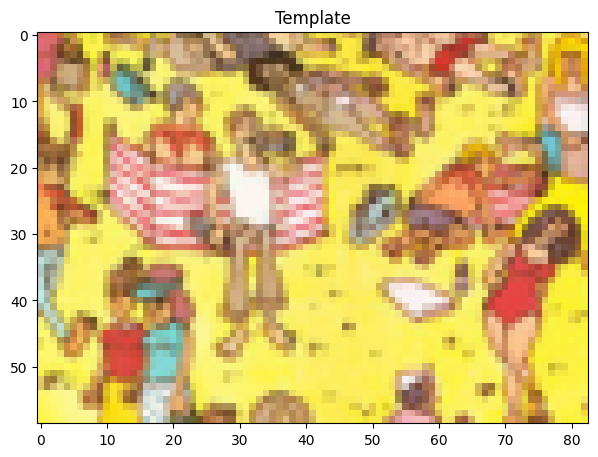

In [34]:
template = cv2.imread('wald_part.png')
imshow('Template', template)

In [35]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/waldo.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('waldo.png', 'wb') as f:
    f.write(response.content)

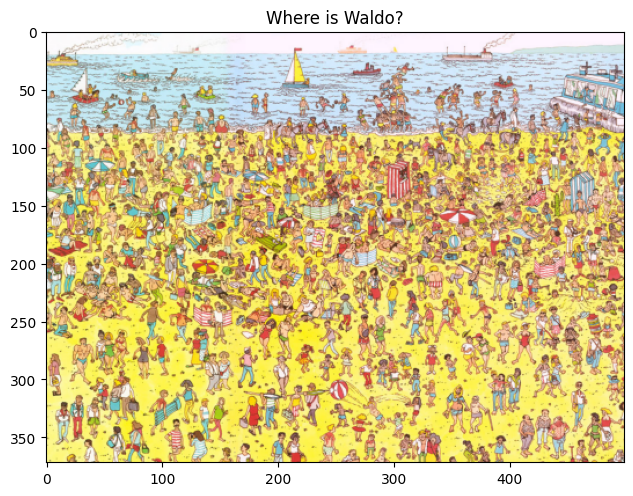

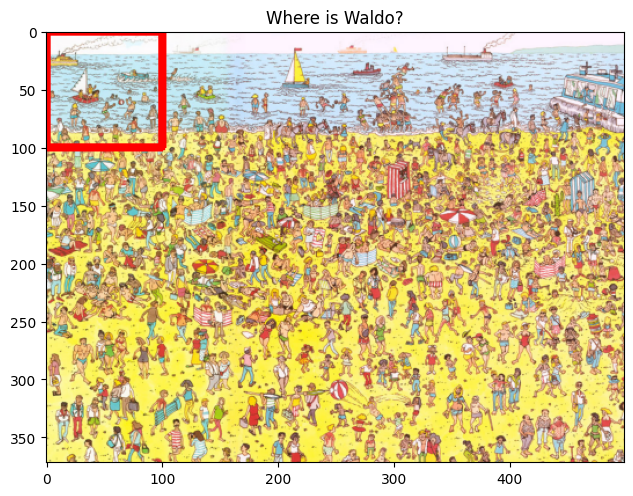

In [39]:
# Load input image and convert to grayscale
image = cv2.imread('waldo.png')
imshow('Where is Waldo?', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('waldo.png',0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 100, top_left[1] + 100)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

imshow('Where is Waldo?', image)

# this task is fail

## **What is a Corner?**

A corner is a point whose local neighborhood stands in two dominant and different edge directions. In other words, a corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness. Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation, and illumination.

![](https://github.com/rohitsh02/classical_cv_projects/raw/main/image_processing/images/edge.png)

### **Harris Corner Detection** is an algorithm developed in 1988 for corner detection that works fairly well.


**Paper** - http://www.bmva.org/bmvc/1988/avc-88-023.pdf

``cv2.cornerHarris(input image, block size, ksize, k)``
- Input image - should be grayscale and float32 type.
- blockSize - the size of neighborhood considered for corner detection
- ksize - aperture parameter of Sobel derivative used.
- k - harris detector free parameter in the equation
- **Output** – array of corner locations (x,y)


In [40]:
# get image from github
import requests

# URL of the image in your GitHub repository
image_url = "https://raw.githubusercontent.com/rohitsh02/classical_cv_projects/main/image_processing/images/chess.png"

# Send a GET request to the image URL
response = requests.get(image_url)

# Save the image to a file in your Colab environment
with open('chess.png', 'wb') as f:
    f.write(response.content)

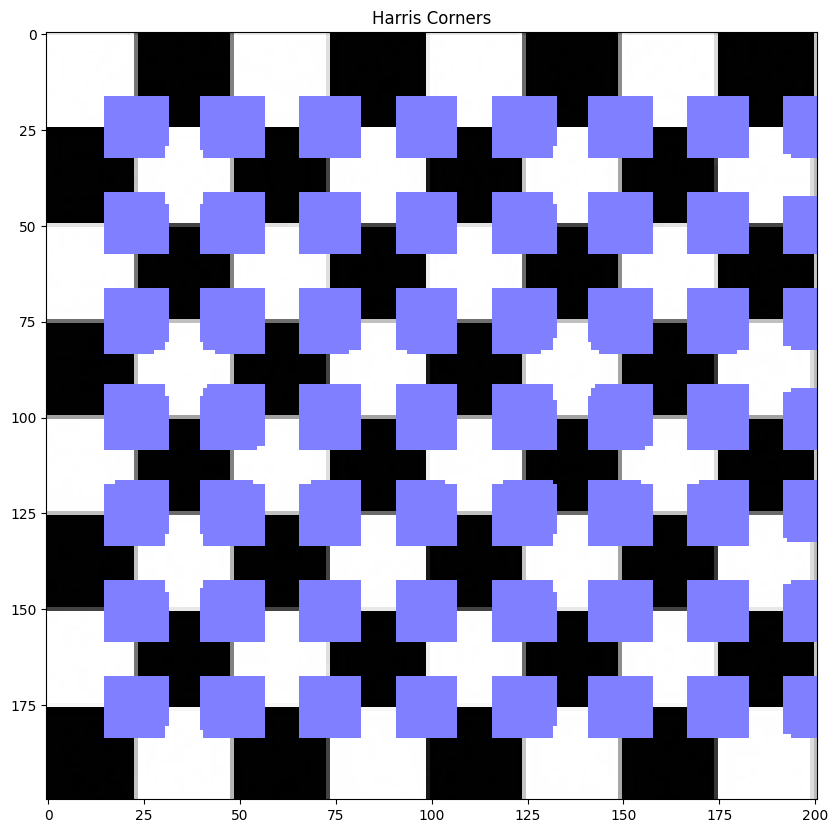

In [41]:
# Load image then grayscale
image = cv2.imread('chess.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

imshow('Harris Corners', image)

``cv2.goodFeaturesToTrack(input image, maxCorners, qualityLevel, minDistance)``

- Input Image - 8-bit or floating-point 32-bit, single-channel image.
- maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
- qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure (smallest eigenvalue). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the  qualityLevel=0.01 , then all the corners with the quality - - measure less than 15 are rejected.
- minDistance – Minimum possible Euclidean distance between the returned corners.

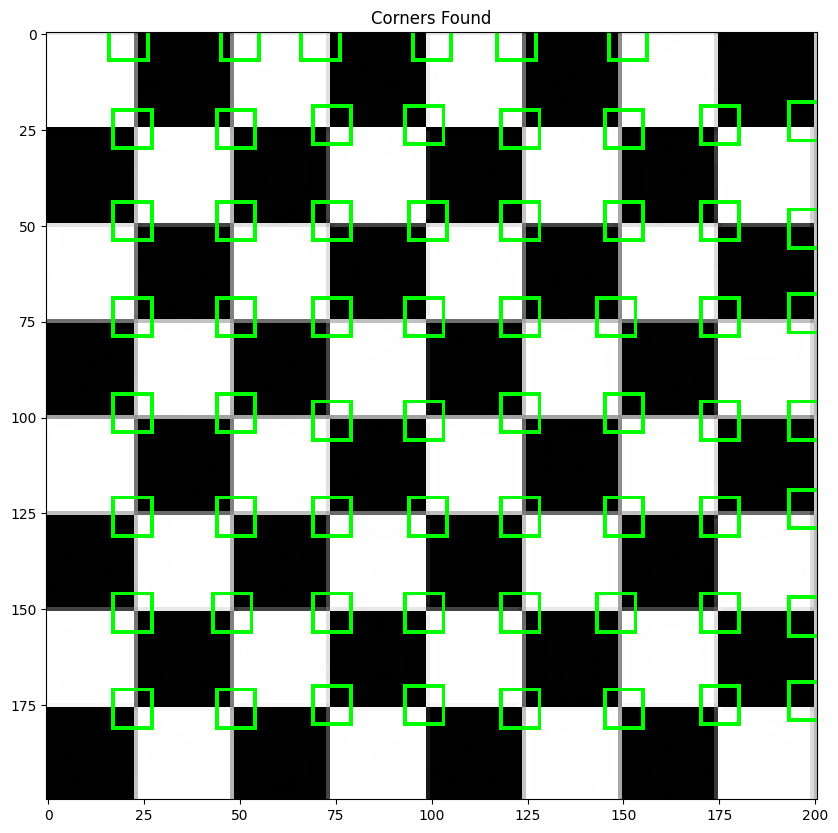

In [46]:
img = cv2.imread('chess.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 150, 0.0005, 10)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-5,y-5),(x+5,y+5),(0,255,0), 1)

imshow("Corners Found", img)